In [ ]:
import os
import zipfile
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory


In [ ]:
import os
import shutil

# Move to kaggle folder
os.makedirs("/root/.kaggle", exist_ok=True)
shutil.move("kaggle.json", "/root/.kaggle/kaggle.json")

# Set permissions
os.chmod("/root/.kaggle/kaggle.json", 600)



In [ ]:
!kaggle datasets download -d fatemehmehrparvar/lung-disease

Dataset URL: https://www.kaggle.com/datasets/fatemehmehrparvar/lung-disease
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/34.9M [00:00<?, ?B/s]
100% 34.9M/34.9M [00:00<00:00, 1.42GB/s]


In [ ]:
import zipfile

with zipfile.ZipFile("lung-disease.zip", 'r') as zip_ref:
    zip_ref.extractall("lung_disease_data")

print(" Dataset unzipped.")


✅ Dataset unzipped.


In [ ]:
import os

for root, dirs, files in os.walk("lung_disease_data"):
    print("Root:", root)
    print("Subdirectories:", dirs)
    break


Root: lung_disease_data
Subdirectories: ['Lung X-Ray Image']


### Path to the datasset

In [ ]:
dataset_path = "lung_disease_data/Lung X-Ray Image/Lung X-Ray Image"


In [ ]:
img_size = (224, 224)
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=img_size,
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=img_size,
    batch_size=batch_size
)


Found 3475 files belonging to 3 classes.
Using 2780 files for training.
Found 3475 files belonging to 3 classes.
Using 695 files for validation.


In [ ]:
class_names = train_ds.class_names
print("Class Labels:", class_names)


Class Labels: ['Lung_Opacity', 'Normal', 'Viral Pneumonia']


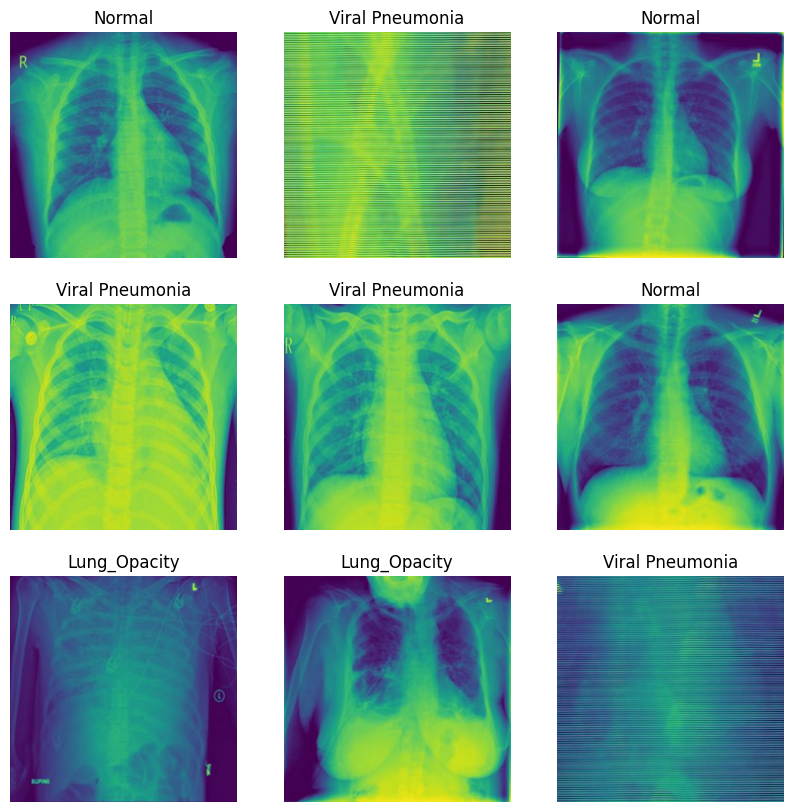

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


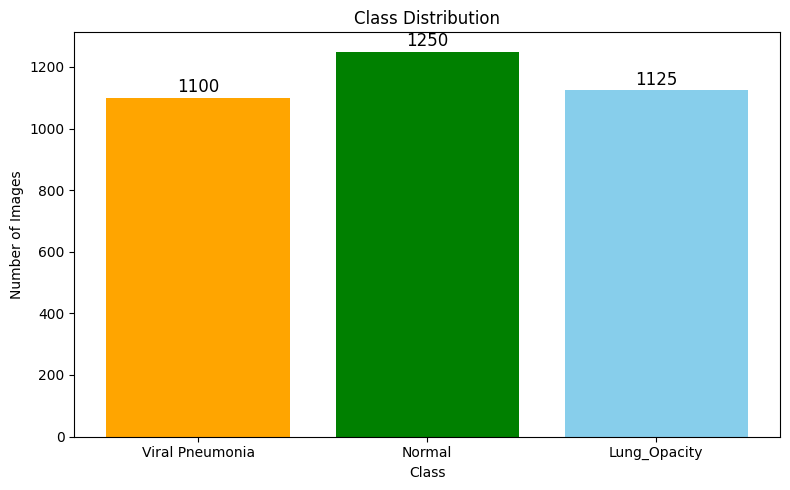

In [ ]:
import os
import matplotlib.pyplot as plt

# Set the path to your dataset folders
data_dir = "lung_disease_data/Lung X-Ray Image/Lung X-Ray Image"
class_counts = {}

# Count number of images in each class folder
for class_name in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_name)
    if os.path.isdir(class_path):
        class_counts[class_name] = len(os.listdir(class_path))

# Plotting
plt.figure(figsize=(8, 5))
bars = plt.bar(class_counts.keys(), class_counts.values(), color=['orange', 'green', 'skyblue'])
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Images")

# Add count labels on each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 5, int(yval), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 30
LEARNING_RATE = 1e-4



In [ ]:
dataset_path = "lung_disease_data/Lung X-Ray Image/Lung X-Ray Image"

train_ds = image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

class_names = train_ds.class_names


Found 3475 files belonging to 3 classes.
Using 2780 files for training.
Found 3475 files belonging to 3 classes.
Using 695 files for validation.


In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.15),
    tf.keras.layers.RandomZoom(0.2),
])


In [ ]:
model = Sequential([
    data_augmentation,

    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer=Adam(learning_rate=LEARNING_RATE),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=[early_stop]
)


Epoch 1/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 21s 134ms/step - accuracy: 0.6467 - loss: 1.3980 - val_accuracy: 0.5151 - val_loss: 1.3161
Epoch 2/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 14s 120ms/step - accuracy: 0.7738 - loss: 0.6123 - val_accuracy: 0.5554 - val_loss: 0.9155
Epoch 3/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 21s 123ms/step - accuracy: 0.7771 - loss: 0.5871 - val_accuracy: 0.7885 - val_loss: 0.5199
Epoch 4/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 11s 123ms/step - accuracy: 0.7924 - loss: 0.5161 - val_accuracy: 0.7741 - val_loss: 0.5389
Epoch 5/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 20s 122ms/step - accuracy: 0.7978 - loss: 0.5201 - val_accuracy: 0.7727 - val_loss: 0.4601
Epoch 6/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 11s 124ms/step - accuracy: 0.7897 - loss: 0.5036 - val_accuracy: 0.8201 - val_loss: 0.4346
Epoch 7/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 20s 121ms/step - accuracy: 0.8071 - loss: 0.4834 - val_accuracy: 0.8086 - val_loss: 0.4573
Epoch 8/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 21s 123ms/step - accuracy: 0.8145 - loss: 0.4444 - val_accu

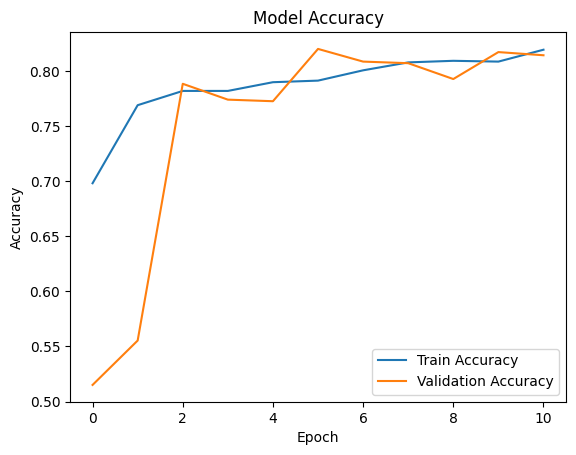

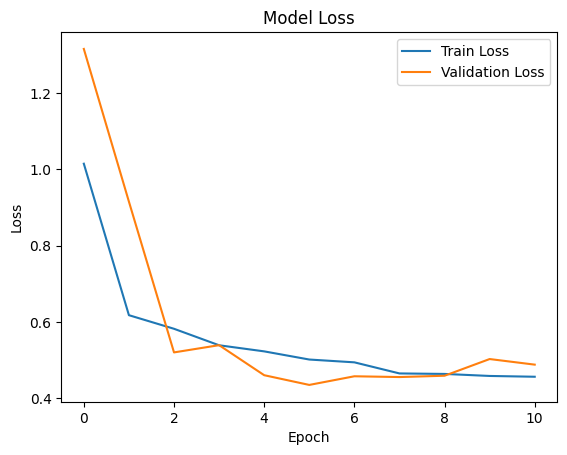

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
import numpy as np

y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


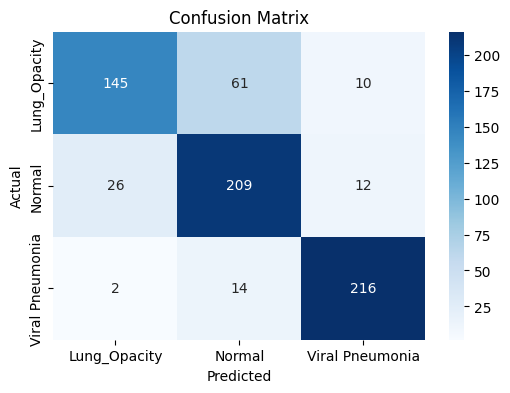

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


Classification Report:
                 precision    recall  f1-score   support

   Lung_Opacity       0.84      0.67      0.75       216
         Normal       0.74      0.85      0.79       247
Viral Pneumonia       0.91      0.93      0.92       232

       accuracy                           0.82       695
      macro avg       0.83      0.82      0.82       695
   weighted avg       0.82      0.82      0.82       695



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


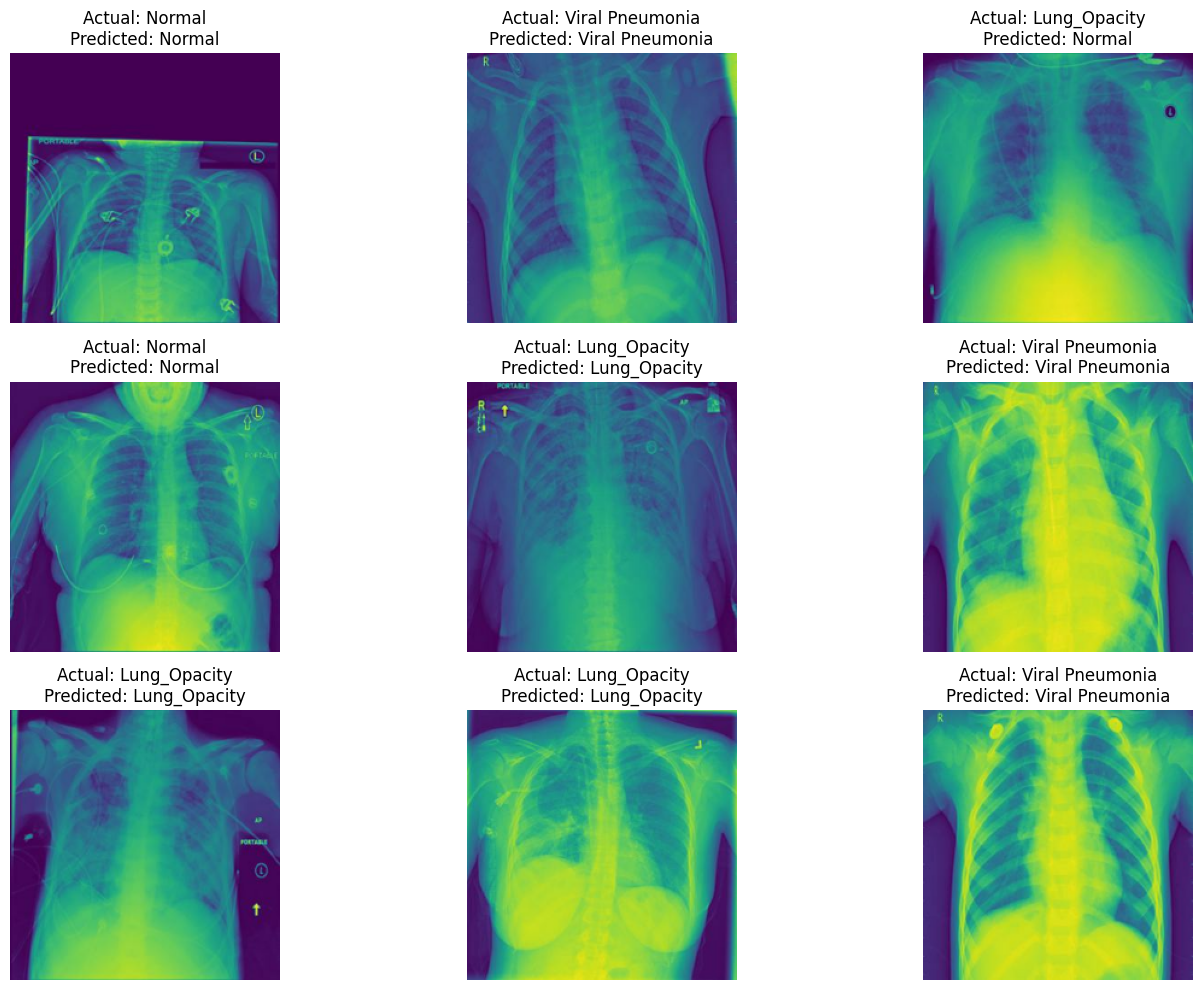

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch from validation dataset
for images, labels in val_ds.take(1):
    predictions = model.predict(images)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = labels.numpy()

    # Plot 9 random images
    plt.figure(figsize=(15, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        actual_label = class_names[true_classes[i]]
        predicted_label = class_names[predicted_classes[i]]
        plt.title(f"Actual: {actual_label}\nPredicted: {predicted_label}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()
    break


In [ ]:
###Lets start doing mobinet v2 model


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


In [ ]:
 #Load MobileNetV2 Base Model
 base_model = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # Freeze base model


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# lets add customise classification add

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(len(class_names), activation='softmax')(x)

model_mobilenet = Model(inputs=base_model.input, outputs=output)


In [ ]:
## let compile the model now

model_mobilenet.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
#training the mobilenet v2
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_mobilenet = model_mobilenet.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=[early_stop]
)


Epoch 1/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 47s 351ms/step - accuracy: 0.4610 - loss: 1.1334 - val_accuracy: 0.7568 - val_loss: 0.6383
Epoch 2/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 44s 54ms/step - accuracy: 0.6882 - loss: 0.7150 - val_accuracy: 0.7856 - val_loss: 0.5447
Epoch 3/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.7683 - loss: 0.5892 - val_accuracy: 0.7942 - val_loss: 0.4991
Epoch 4/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.7830 - loss: 0.5500 - val_accuracy: 0.8187 - val_loss: 0.4618
Epoch 5/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.7923 - loss: 0.5173 - val_accuracy: 0.8144 - val_loss: 0.4494
Epoch 6/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.8189 - loss: 0.4643 - val_accuracy: 0.8201 - val_loss: 0.4276
Epoch 7/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.8216 - loss: 0.4599 - val_accuracy: 0.8216 - val_loss: 0.4246
Epoch 8/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.8368 - loss: 0.4270 - val_accuracy: 0.8432 

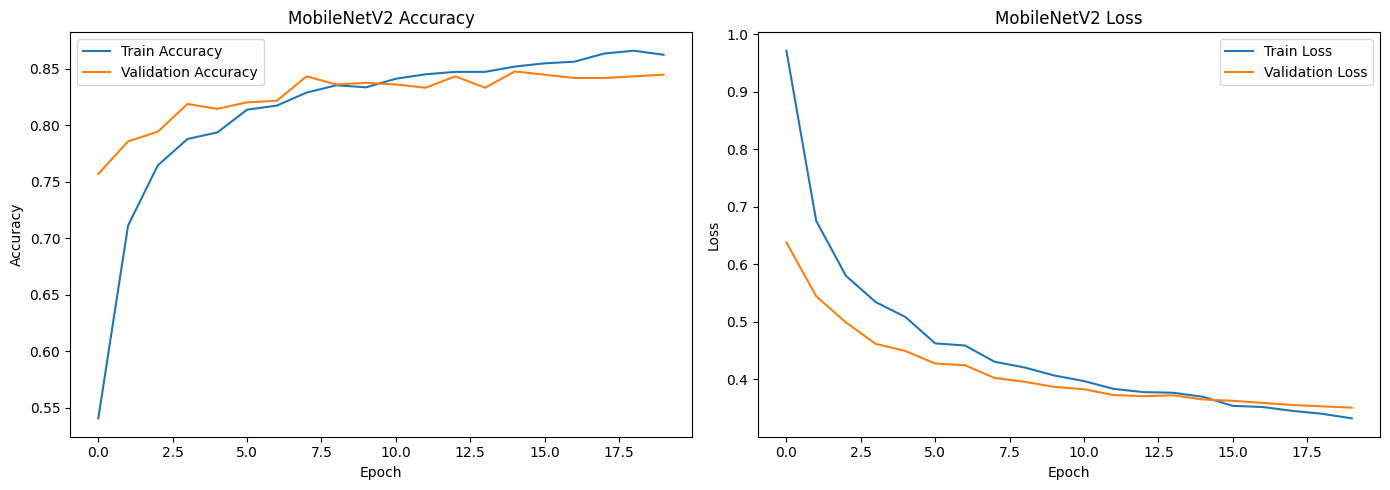

In [ ]:
#plot accuracy and loss curves
plt.figure(figsize=(14, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_mobilenet.history['accuracy'], label='Train Accuracy')
plt.plot(history_mobilenet.history['val_accuracy'], label='Validation Accuracy')
plt.title('MobileNetV2 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history_mobilenet.history['loss'], label='Train Loss')
plt.plot(history_mobilenet.history['val_loss'], label='Validation Loss')
plt.title('MobileNetV2 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
y_true_mn = []
y_pred_mn = []

for images, labels in val_ds:
    preds = model_mobilenet.predict(images)
    y_true_mn.extend(labels.numpy())
    y_pred_mn.extend(np.argmax(preds, axis=1))

y_true_mn = np.array(y_true_mn)
y_pred_mn = np.array(y_pred_mn)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


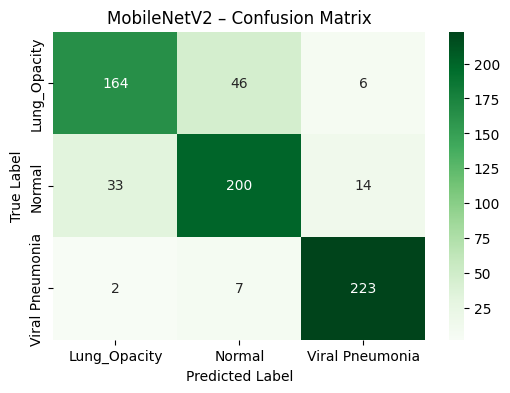

In [ ]:
cm_mn = confusion_matrix(y_true_mn, y_pred_mn)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_mn, annot=True, fmt='d', cmap='Greens',
            xticklabels=class_names, yticklabels=class_names)
plt.title('MobileNetV2 – Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
print("MobileNetV2 – Classification Report") #classification report
print(classification_report(y_true_mn, y_pred_mn, target_names=class_names))


MobileNetV2 – Classification Report
                 precision    recall  f1-score   support

   Lung_Opacity       0.82      0.76      0.79       216
         Normal       0.79      0.81      0.80       247
Viral Pneumonia       0.92      0.96      0.94       232

       accuracy                           0.84       695
      macro avg       0.84      0.84      0.84       695
   weighted avg       0.84      0.84      0.84       695



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


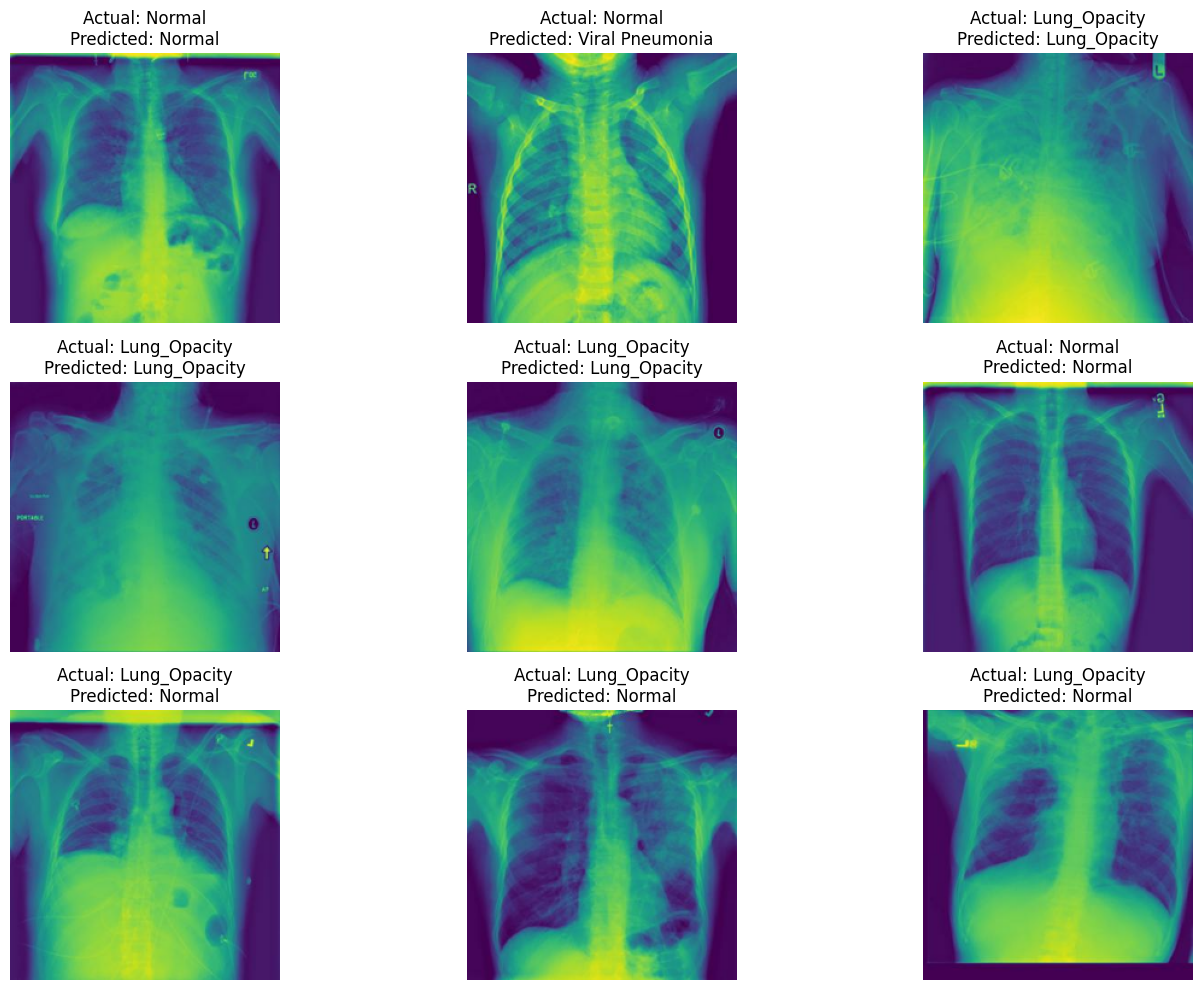

In [ ]:
for images, labels in val_ds.take(1):
    predictions = model.predict(images)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = labels.numpy()

    plt.figure(figsize=(15, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        actual_label = class_names[true_classes[i]]
        predicted_label = class_names[predicted_classes[i]]
        plt.title(f"Actual: {actual_label}\nPredicted: {predicted_label}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()
    break


Lets build the last model for this project VGG16



In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.applications.vgg16 import preprocess_input

In [ ]:
# Load VGG16 base model without top layers
vgg_base = VGG16(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
vgg_base.trainable = False  # Freeze the base model

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Add custom classification head
x = vgg_base.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(len(class_names), activation='softmax')(x)

In [ ]:
# Build the final model
vgg_model = Model(inputs=vgg_base.input, outputs=output)

# Compile the model
vgg_model.compile(optimizer=Adam(learning_rate=1e-4),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Model summary
vgg_model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,780,739 (56.38 MB)

 Trainable params: 66,051 (258.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# Train the VGG16 model
history_vgg = vgg_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=25,
    callbacks=[early_stop]
)


Epoch 1/25
87/87 ━━━━━━━━━━━━━━━━━━━━ 62s 550ms/step - accuracy: 0.5663 - loss: 1.3072 - val_accuracy: 0.7712 - val_loss: 0.5968
Epoch 2/25
87/87 ━━━━━━━━━━━━━━━━━━━━ 39s 199ms/step - accuracy: 0.8082 - loss: 0.4783 - val_accuracy: 0.8259 - val_loss: 0.4465
Epoch 3/25
87/87 ━━━━━━━━━━━━━━━━━━━━ 23s 225ms/step - accuracy: 0.8492 - loss: 0.3722 - val_accuracy: 0.8532 - val_loss: 0.3915
Epoch 4/25
87/87 ━━━━━━━━━━━━━━━━━━━━ 19s 204ms/step - accuracy: 0.8728 - loss: 0.3169 - val_accuracy: 0.8518 - val_loss: 0.3808
Epoch 5/25
87/87 ━━━━━━━━━━━━━━━━━━━━ 18s 202ms/step - accuracy: 0.8868 - loss: 0.2852 - val_accuracy: 0.8633 - val_loss: 0.3464
Epoch 6/25
87/87 ━━━━━━━━━━━━━━━━━━━━ 22s 218ms/step - accuracy: 0.9018 - loss: 0.2560 - val_accuracy: 0.8705 - val_loss: 0.3504
Epoch 7/25
87/87 ━━━━━━━━━━━━━━━━━━━━ 19s 204ms/step - accuracy: 0.9067 - loss: 0.2438 - val_accuracy: 0.8705 - val_loss: 0.3228
Epoch 8/25
87/87 ━━━━━━━━━━━━━━━━━━━━ 20s 204ms/step - accuracy: 0.9110 - loss: 0.2271 - val_accu

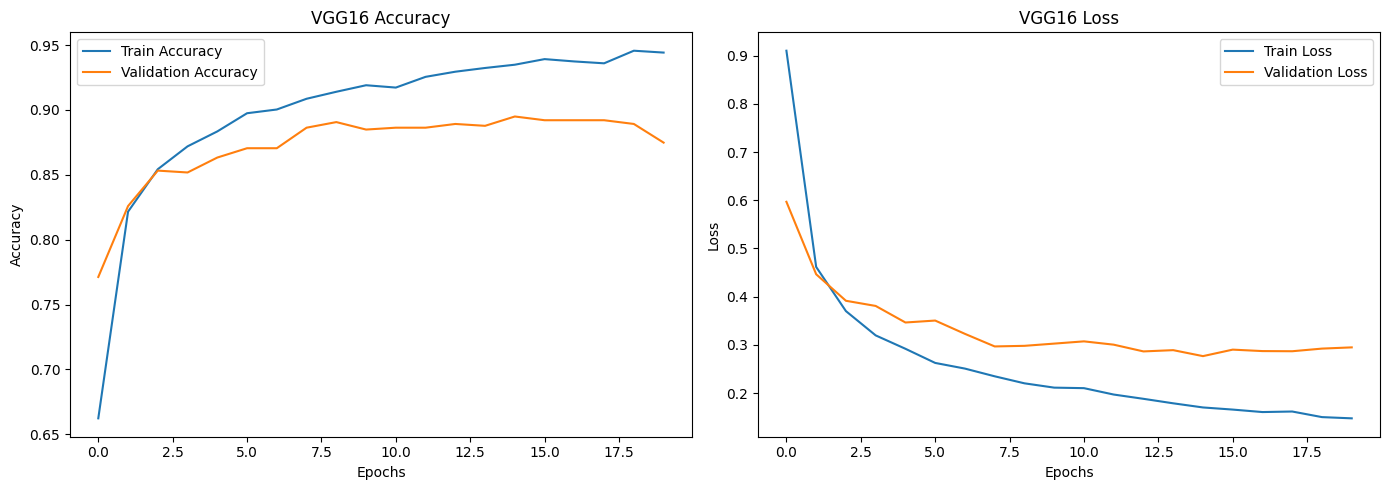

In [ ]:
# Plot training vs validation accuracy and loss for VGG16
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history_vgg.history['accuracy'], label='Train Accuracy')
plt.plot(history_vgg.history['val_accuracy'], label='Validation Accuracy')
plt.title('VGG16 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_vgg.history['loss'], label='Train Loss')
plt.plot(history_vgg.history['val_loss'], label='Validation Loss')
plt.title('VGG16 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 768ms/step


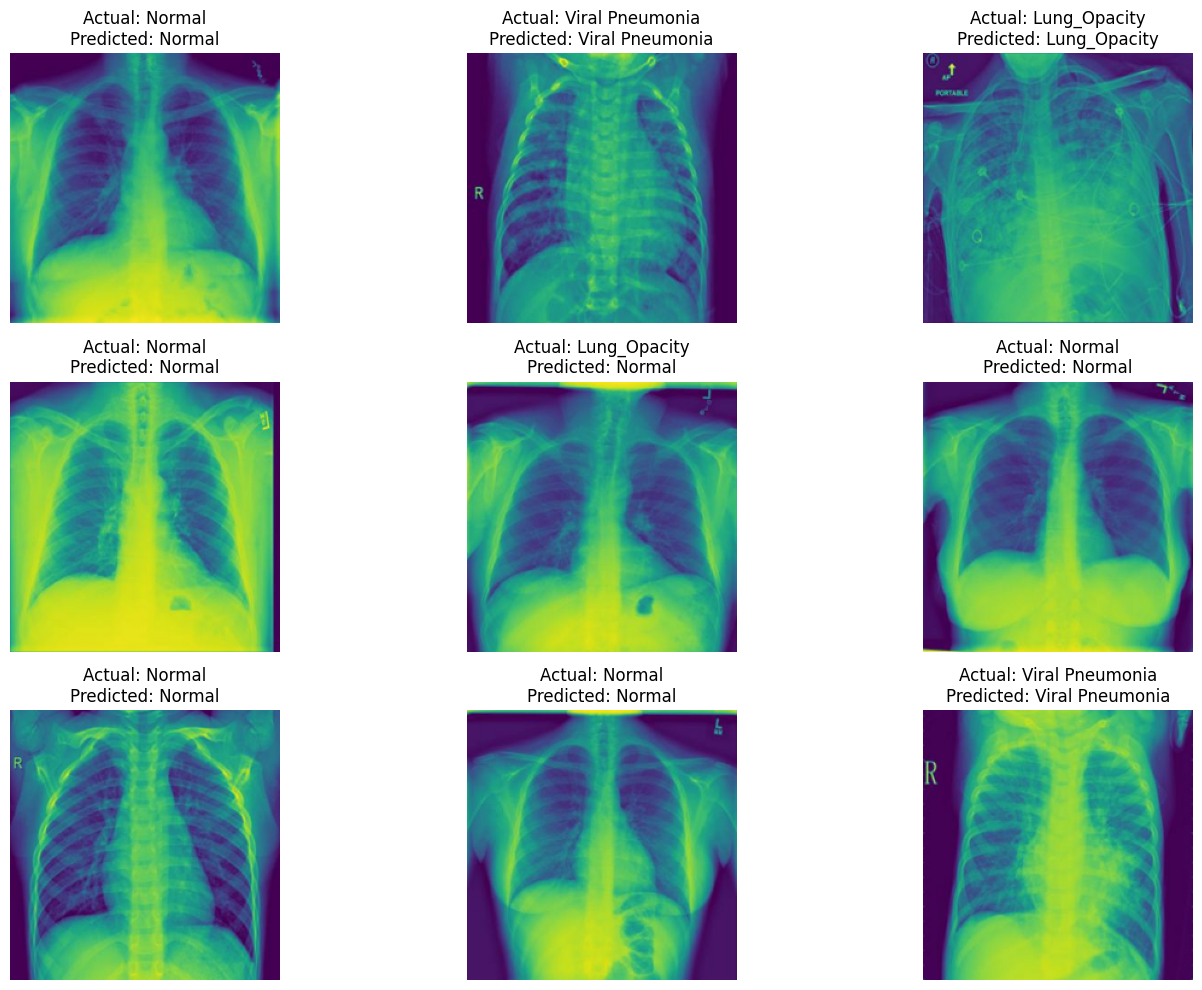

In [ ]:
# Predict and visualize 9 validation images using VGG16
for images, labels in val_ds.take(1):
    predictions = vgg_model.predict(images)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = labels.numpy()

    plt.figure(figsize=(15, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Actual: {class_names[true_classes[i]]}\nPredicted: {class_names[predicted_classes[i]]}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()
    break


In [ ]:
# Evaluate VGG16 on the validation set
y_true, y_pred = [], []
for images, labels in val_ds:
    preds = vgg_model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=class_names, yticklabels=class_names)
plt.title('VGG16 Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print classification report
print("VGG16 Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))
